In [1]:
import dill
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.transforms as transforms
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

from scipy.stats import linregress

import trompy as tp

%matplotlib inline

In [2]:
datafolder = "C:\\Github\\Distraction-Paper\\data\\"
figfolder = "C:\\Github\\Distraction-Paper\\figs\\"
outputfolder = "C:\\Github\\Distraction-Paper\\output\\"

try:
    pickle_in = open(datafolder + "distraction_data_only_snips.pickle", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')

[modDict, disDict, habDict] = dill.load(pickle_in)

In [3]:
rat = 'thph1.1'
d = disDict[rat]
d.keys()

dict_keys(['rat', 'rms', 'fs', 'deltaF', 'tick', 'filt_sd', 'licks', 'licks_off', 'distractors', 'distracted', 'notdistracted', 'd_bool_array', 'pdp', 'pre_dp', 'trialtype', 'lickdata', 'snips_distractors', 'snips_distracted', 'snips_not-distracted'])

In [4]:
epoch = [60, 90]
pdp_threshold = 1

PDPs = []
AUCs = []

rats = disDict.keys()
for rat in rats:
    d = disDict[rat]
    snips = d["snips_distractors"]["filt_z"]
    
    PDPs.append([pdp for pdp in d["pdp"] if pdp > pdp_threshold])
    AUCs.append([np.sum(snip[epoch[0]:epoch[1]]) for snip, pdp in zip(snips, d["pdp"]) if pdp > pdp_threshold])
    
PDPs = tp.flatten_list(PDPs)
AUCs = tp.flatten_list(AUCs)

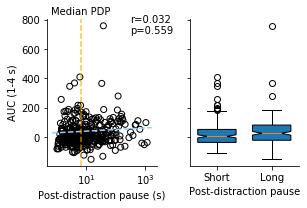

In [91]:

f, [ax1, ax2] = plt.subplots(figsize=(5, 3), ncols=2, sharey=True)
f.subplots_adjust(left=0.2, bottom=0.2, wspace=0.3)

trans = transforms.blended_transform_factory(
            ax1.transData, ax1.transAxes)

ax1.scatter(PDPs, AUCs, marker="o", color="none", edgecolor="k")

ax1.set_ylabel("AUC (1-4 s)")
ax1.set_xlabel("Post-distraction pause (s)")

ax1.set_xscale("log")

slope, intercept, r, p, _ = linregress(PDPs, AUCs)

x1, x2 = ax1.get_xlim()
ax1.plot([x1, x2], [x1*slope + intercept, x2*slope+intercept], "--", color="xkcd:light blue")


stats_str = f"r={r:2.2}\np={p:2.3}" 
ax1.text(300, 0.9, stats_str, transform=trans, ha="left")


median_pdp = np.median(PDPs)
ax1.axvline(median_pdp, linestyle="--", color="orange", alpha=0.7)
ax1.text(median_pdp, 1.03, "Median PDP", ha="center", transform=trans)



AUC_from_shPDPs = [auc for auc, pdp in zip(AUCs, PDPs) if pdp <= median_pdp]
AUC_from_loPDPs = [auc for auc, pdp in zip(AUCs, PDPs) if pdp >= median_pdp]


ax2.boxplot([AUC_from_shPDPs, AUC_from_loPDPs],
            widths=0.7,
            patch_artist =True,
            notch=True)

ax2.set_xticklabels(["Short", "Long"])
ax2.set_xlabel("Post-distraction pause")

for axis in [ax1, ax2]:
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)

f.savefig(figfolder+"figs5_pdp_and_auc.pdf")

# ax2.set_yscale("log")



In [67]:
max(AUC_from_loPDPs)

757.9331344547738

In [54]:
from scipy.stats import ttest_rel as ttest
from scipy.stats import ttest_ind as ttest_ind

print("Median AUC on short PDP trials is", np.median(AUC_from_shPDPs), "and mean is", np.mean(AUC_from_shPDPs))
print("Median AUC on long PDP trials is", np.median(AUC_from_loPDPs), "and mean is", np.mean(AUC_from_loPDPs))

print(ttest_ind(AUC_from_shPDPs, AUC_from_loPDPs))

print(ttest_ind(np.sqrt(AUC_from_shPDPs), np.sqrt(AUC_from_loPDPs)))

# print("The proportion of trials in which the last distractor was within the baseline period is approximately:")
# print(len([L for L in pre_dps_notdistracted_all if L < 5]) / len(pre_dps_notdistracted_all), "for nondistracted trials.")
# print(len([L for L in pre_dps_distracted_all if L < 5]) / len(pre_dps_notdistracted_all), "for distracted trials.")

minval = np.abs(min(min(AUC_from_shPDPs), min(AUC_from_loPDPs)))

tr_shPDPs = AUC_from_shPDPs + (minval + 1)
tr_loPDPs = AUC_from_loPDPs + (minval + 1)

print(ttest_ind(np.log(tr_shPDPs), np.log(tr_loPDPs)))

tr_shPDPs

Median AUC on short PDP trials is 5.937955018634052 and mean is 22.276669291787826
Median AUC on long PDP trials is 26.714134466129565 and mean is 37.14036832311489
Ttest_indResult(statistic=-1.566305743532648, pvalue=0.11820182862620787)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=-1.0912381721623996, pvalue=0.2759362761061925)


C:\ProgramData\Anaconda3\envs\dis\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


array([ 97.66934822, 154.1993562 ,  82.58856965, 123.126783  ,
       101.82879442, 116.2658916 ,  83.09137563, 191.5758055 ,
       219.65406648,  98.58649217, 164.8120904 , 116.95174922,
        59.93995619, 144.17034189, 148.90716144, 113.37687842,
       133.08024387, 112.01061545, 206.97950161, 185.1434157 ,
       222.97157474, 408.49256515,  82.69957315, 164.40795782,
       115.79393589,  74.56733606, 108.10617911, 124.47287   ,
       130.4112578 , 130.95472752, 110.01194811, 158.0026843 ,
        91.51213532, 166.34225584, 139.36576554, 134.1992023 ,
       113.18222526, 163.94834019, 112.61204475, 127.90533508,
       115.96395525, 171.26211541, 114.64319026, 141.78697771,
        86.63215419, 110.09982071,  83.01792569, 102.52844018,
       112.5470395 ,  90.55329598, 137.27819182, 227.85410118,
        71.71894582, 134.41647033, 259.36155244, 206.77737521,
       179.60861921, 139.65622206, 180.99735671, 101.45349572,
        46.35728648, 203.68818711,  51.39511431, 368.95

In [44]:
np.sqrt(AUC_from_shPDPs)

C:\ProgramData\Anaconda3\envs\dis\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([        nan,  1.74300265,         nan,         nan,         nan,
               nan,         nan,  6.35724056,  8.2760358 ,         nan,
        3.69469788,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,  7.47115812,  5.8294183 ,
        8.47409445, 16.04154815,         nan,  3.63959611,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,  2.61560439,         nan,  3.89627487,         nan,
               nan,         nan,  3.5758974 ,         nan,         nan,
               nan,  4.48339352,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,  8.75744273,         nan,         nan, 10.40193513,
        7.45761874,  5.33360303,         nan,  5.46223935,         nan,
               nan,  7.24754366,         nan, 14.75782973,  6.34775544,
               nan, 13.76192097,         nan,         nan,      

In [7]:
print(slope, intercept, r, p)

0.022107900050024165 28.80617658954732 0.03157991037341743 0.5593994324098989


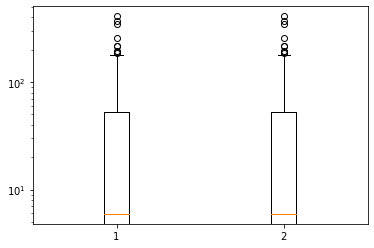

In [12]:
median_pdp = np.median(PDPs)

AUC_from_shPDPs = [auc for auc, pdp in zip(AUCs, PDPs) if pdp < median_pdp]
AUC_from_loPDPs = [auc for auc, pdp in zip(AUCs, PDPs) if pdp > median_pdp]

f, ax = plt.subplots()

ax.boxplot([AUC_from_shPDPs, AUC_from_shPDPs])

ax.set_yscale("log")


In [49]:
slope*x

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [50]:
slope

0.019734111992620314